### Heights & Weights Regression Example
This is an example of univariate (or simple) regression. We will use the heights & weights dataset downloaded from Kaggle to illustrate the simple regression algorithm.

In [1]:
# import necessary libraries
import os
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# set the path of the dataset
data_file_path = pathlib.Path(os.getcwd()) / "data" / "height_weight.csv"

In [3]:
# load the data into a Pandas dataframe
df = pd.read_csv(data_file_path)
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [4]:
# check if there is any missig data
df.isnull().sum()

Index             0
Height(Inches)    0
Weight(Pounds)    0
dtype: int64

In [5]:
# how many rows in dataset?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           25000 non-null  int64  
 1   Height(Inches)  25000 non-null  float64
 2   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 586.1 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Index,25000.0,12500.500000,7217.022701,1.00000,6250.750000,12500.50000,18750.250000,25000.0000
Height(Inches),25000.0,67.993114,1.901679,60.27836,66.704397,67.99570,69.272958,75.1528
Weight(Pounds),25000.0,127.079421,11.660898,78.01476,119.308675,127.15775,134.892850,170.9240


In [7]:
# we don't need the index column
df.drop(columns=["Index"], inplace=True)

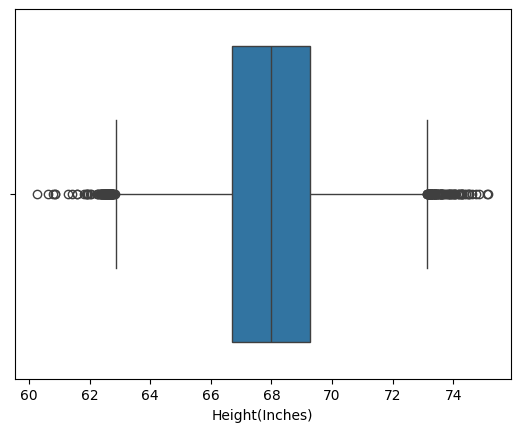

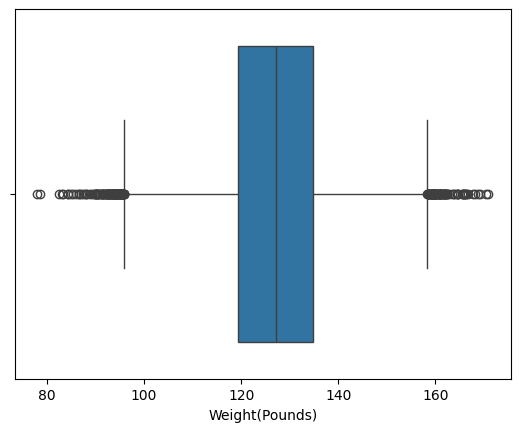

In [8]:
# check for outliers by plotting a box plot
for col in df.columns:
    sns.boxplot(data=df, x=df[col])
    plt.show()

In [9]:
# calculate the quantiles
Q1, Q3 = df.quantile(0.25), df.quantile(0.75)
IQR = Q3 - Q1
print(Q1)
print("-" * 20)
print(Q3)
print("-" * 20)
print(IQR)

Height(Inches)     66.704397
Weight(Pounds)    119.308675
Name: 0.25, dtype: float64
--------------------
Height(Inches)     69.272958
Weight(Pounds)    134.892850
Name: 0.75, dtype: float64
--------------------
Height(Inches)     2.568560
Weight(Pounds)    15.584175
dtype: float64


In [10]:
# determine the upper & lower bounds
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR
print(f"Lower bound:\n{lower}\n\nUpper bound:\n{upper}")

Lower bound:
Height(Inches)    62.851557
Weight(Pounds)    95.932412
dtype: float64

Upper bound:
Height(Inches)     73.125798
Weight(Pounds)    158.269113
dtype: float64


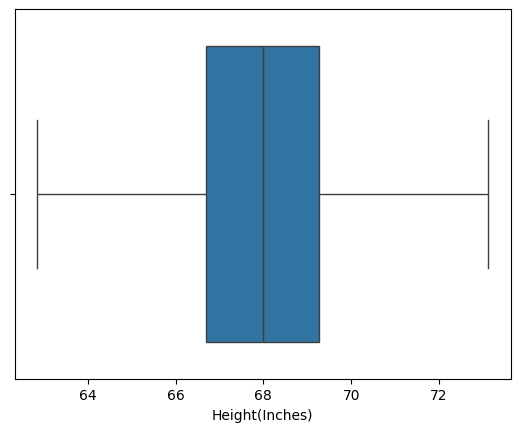

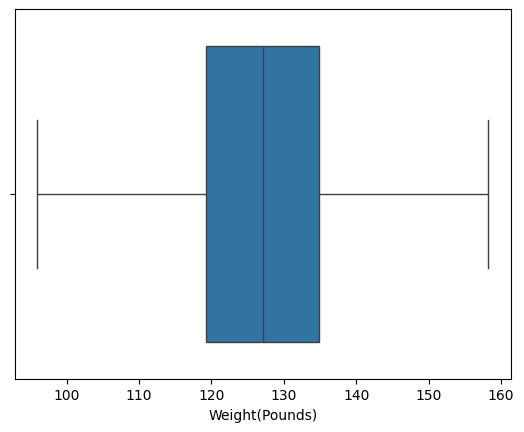

In [11]:
# clip the data to IQR limits
for col in df.columns:
    df[col] = np.where(df[col] > upper[col], upper[col], df[col])
    df[col] = np.where(df[col] < lower[col], lower[col], df[col])
    sns.boxplot(data=df, x=df[col])
    plt.show()

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Height(Inches),25000.0,67.992783,1.891065,62.851557,66.704397,67.99570,69.272958,73.125798
Weight(Pounds),25000.0,127.084114,11.574377,95.932412,119.308675,127.15775,134.892850,158.269113


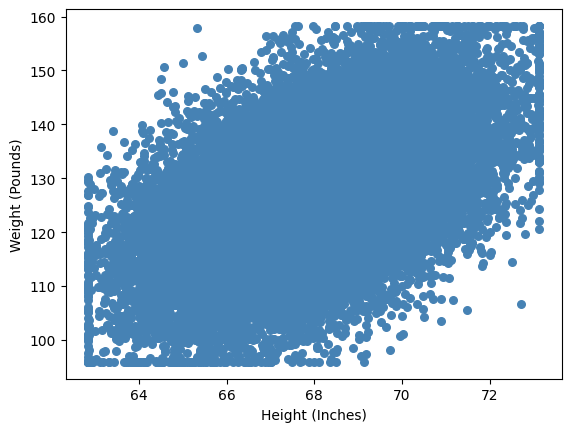

In [13]:
# let us plot the height (y) vs weight (X) to check linearity
plt.scatter(df["Height(Inches)"], df["Weight(Pounds)"], s=30, c="steelblue")
plt.xlabel("Height (Inches)")
plt.ylabel("Weight (Pounds)")
plt.show()

<Axes: xlabel='Height(Inches)', ylabel='Count'>

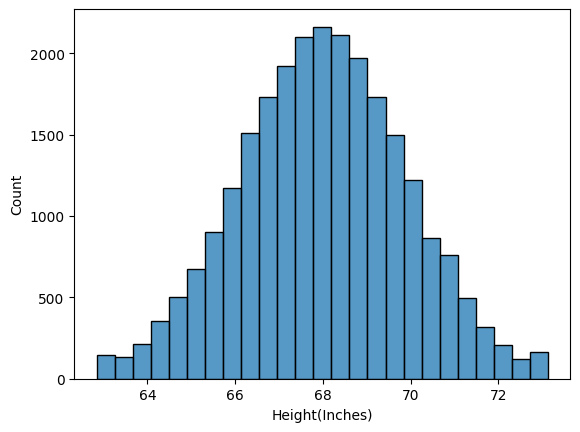

In [14]:
# let's see the data distribution of height
sns.histplot(data=df, x="Height(Inches)", bins=25)

<Axes: xlabel='Weight(Pounds)', ylabel='Count'>

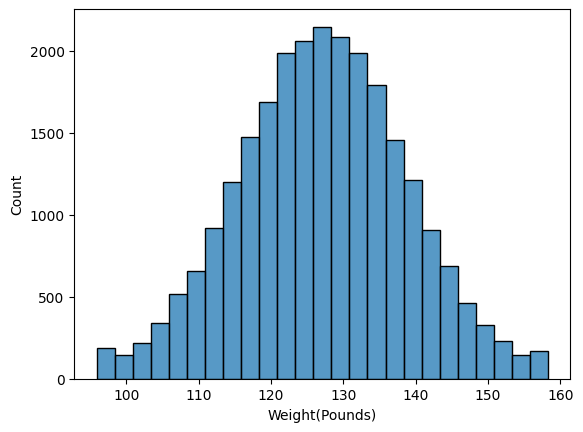

In [15]:
# let's see the data distribution of weight
sns.histplot(data=df, x="Weight(Pounds)", bins=25)

In [16]:
# split data into train/test sets
from sklearn.model_selection import train_test_split

X, y = df[["Height(Inches)"]], df["Weight(Pounds)"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)
print(
    f"X_train: {X_train.shape} - y_train: {y_train.shape} - X_test: {X_test.shape} - y_test: {y_test.shape}"
)

X_train: (18750, 1) - y_train: (18750,) - X_test: (6250, 1) - y_test: (6250,)


In [17]:
# standardize rhe features
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.transform(X_test)

In [18]:
# create the model
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train_std, y_train)
regressor.coef_, regressor.intercept_

(array([5.77697159]), 127.07211069240002)

Text(0.5, 1.0, '$y = 5.777 * x + 127.072$')

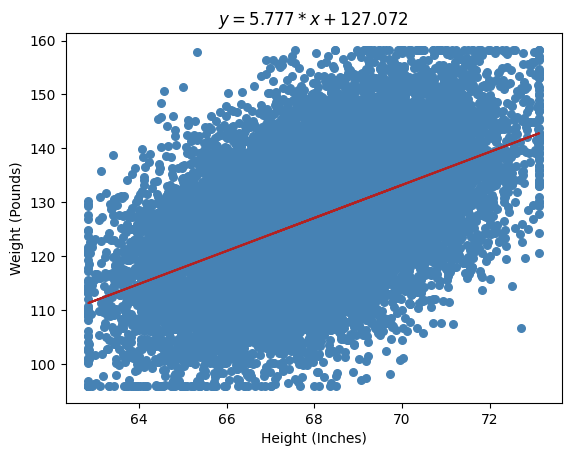

In [19]:
# plot the training data & prediction
plt.scatter(X_train, y_train, s=30, c="steelblue")
plt.plot(X_train, regressor.predict(X_train_std), c="firebrick")
plt.xlabel("Height (Inches)")
plt.ylabel("Weight (Pounds)")
plt.title(f"$y = {regressor.coef_[0]:.3f} * x + {regressor.intercept_:.3f}$")

In [20]:
y_pred = regressor.predict(X_test_std)
X_test["Actual Weight(Pounds)"] = y_test
X_test["Predicted Weight(Pounds)"] = y_pred

In [21]:
X_test

,Height(Inches),Actual Weight(Pounds),Predicted Weight(Pounds)
6868,68.42447,134.2855,128.392905
24016,67.89663,111.9666,126.774549
9668,67.65922,135.9871,126.046651
13640,69.01299,126.3802,130.197305
14018,69.01055,100.1810,130.189824
...,...,...,...
24717,63.76497,105.0288,114.106895
2578,69.34872,148.1527,131.226652
10121,69.24622,135.6679,130.912387
21601,64.57820,113.4876,116.600255


In [22]:
# metrics
from sklearn import metrics

mse = metrics.mean_squared_error(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred)

print(
    f"Metrics:\n  - MSE: {mse:.3f}\n  - MAE: {mae:.3f}\n  - RMSE: {rmse:.3f}\n  - R2-Score: {r2:.3f}"
)

Metrics:
  - MSE: 100.460
  - MAE: 8.005
  - RMSE: 10.023
  - R2-Scpre: 0.258


In [23]:
# lets use some random values for weights
data = pd.DataFrame({"Height(Inches)": list(np.random.randint(60, 80, 5))})
data

,Height(Inches)
0,79
1,61
2,77
3,74
4,71


In [26]:
data_2 = ss.transform(data[["Height(Inches)"]])
print(data_2)

[[ 5.84135295]
 [-3.71173778]
 [ 4.77989843]
 [ 3.18771664]
 [ 1.59553485]]


In [27]:
data["Weight(Pounds)"] = regressor.predict(data_2)
data

,Height(Inches),Weight(Pounds)
0,79,160.817441
1,61,105.629507
2,77,154.685448
3,74,145.487459
4,71,136.289470


In [29]:
# using OLS from statsmodels
import statsmodels.api as sm

result = sm.OLS(y_train, X_train_std).fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:         Weight(Pounds)   R-squared (uncentered):                   0.002
Model:                            OLS   Adj. R-squared (uncentered):              0.002
Method:                 Least Squares   F-statistic:                              38.51
Date:                Tue, 30 Jul 2024   Prob (F-statistic):                    5.56e-10
Time:                        08:24:34   Log-Likelihood:                     -1.1750e+05
No. Observations:               18750   AIC:                                  2.350e+05
Df Residuals:                   18749   BIC:                                  2.350e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [31]:
type(result)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [32]:
result.params

x1    5.776972
dtype: float64